In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
# Set the mean and standard deviation of the normal distribution
mu = 0; sigma = 1
alpha = 0.05

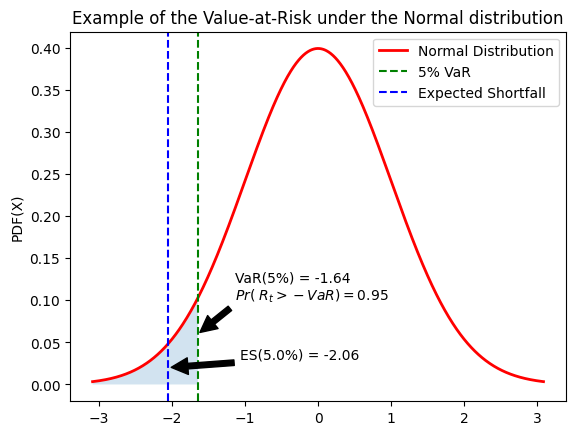

In [41]:
# Generate 1000 random values from the normal distribution
x = np.linspace(norm.ppf(0.001, mu, sigma), norm.ppf(0.999, mu, sigma), 1000)
# Calculate the 5% value at risk (VaR)
VaR = norm.ppf(alpha, mu, sigma)
# Value-at Risk
ES = norm.pdf(norm.ppf(alpha))/0.05

# Plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2, label='Normal Distribution')


x_fill = np.linspace(norm.ppf(0.001, mu, sigma), VaR, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), alpha=0.2)

# Add a vertical line and annotation for the VaR value
plt.axvline(x=VaR, color='g', linestyle='--', label='5% VaR')
plt.annotate(f'VaR(5%) = {VaR:.2f}\n$Pr(~R_t>-VaR) = {1-alpha}$', xy=(VaR, 0.06), xytext=(VaR + 0.5, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add a vertical line and annotation for the ES value
plt.axvline(x=-ES, color='b', linestyle='--', label='Expected Shortfall')
plt.annotate(f'ES({alpha*100}%) = {-ES:.2f}', xy=(-ES, 0.02), xytext=(-ES +1, 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend(loc='best')
plt.ylabel('PDF(X)')
plt.title('Example of the Value-at-Risk under the Normal distribution')
# Show the plot
plt.show()